In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# <span style="color:red;">ch1.허깅페이스</span>
- Transformers 라이브러리 내 pipeline()함수
- INference API : key를 사용 
## 1. 텍스트기반 감정분석 (긍정/부정)

In [3]:
from transformers import pipeline
classifier = pipeline(task="text-classification",
                      model='distilbert-base-uncased-finetuned-sst-2-english')
classifier("I've been waiting for a HuggingFace course my whole life.")

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [4]:
classifier("이 영화는 최고입니다. 감동적이고 연기가 대단해요")

[{'label': 'POSITIVE', 'score': 0.8878775835037231}]

In [5]:
result = classifier(["I've been waiting for a HuggingFace course my whole life.",
                     "I hate this so much!"])
[r.get('label') for r in result]

['POSITIVE', 'NEGATIVE']

In [6]:
classifier = pipeline(task='sentiment-analysis',
                      model='distilbert-base-uncased-finetuned-sst-2-english')

classifier(["I've been waiting for a HuggingFace course my whole life.",
                     "I hate this so much!"])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## 2. 제로-샷 분류(zero-shot-classification)
- 비지도학습

In [8]:
classifier = pipeline(task='zero-shot-classification',
                     model="facebook/bart-large-mnli")

classifier('I have a problem with my iphone that needs to be resolved asap!!',
            candidate_labels=["phone","urgent","tablet","computer"])

Device set to use cpu


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'tablet'],
 'scores': [0.5049763917922974,
  0.48007503151893616,
  0.012633666396141052,
  0.0023148944601416588]}

In [9]:
# 제
classifier(
        "This is a course about the transformers library.",
        candidate_labels=["education","business","politics"])

{'sequence': 'This is a course about the transformers library.',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.9053581357002258, 0.07259627431631088, 0.02204558439552784]}

## 3. text 생성

In [14]:
generator = pipeline(task="text-generation",
                     model="gpt2")           # 허깅페이스에는 gpt2까지 
generator("In this course. We will teach you how to",
          pad_token_id=generator.tokenizer.eos_token_id)

Device set to use cpu


[{'generated_text': 'In this course. We will teach you how to use your camera to create a 3D virtual reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment that will show you the fundamentals of VR.\n\nWe will show you how to create a 3D Virtual Reality environment

In [16]:
generator("이 과정은 다음과 같은 방법을 알려드려요.",
          pad_token_id=generator.tokenizer.eos_token_id)

[{'generated_text': '이 과정은 다음과 같은 방법을 알려드려요. 대타의 권드 는때 해스트을 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아트려한는떘 아'}]

## 4. 마스크 채우기

In [19]:
unmasker = pipeline(task="fill-mask",
                    model="distilroberta-base")
unmasker("I'm going to hospital and meet a <mask>")

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.19275875389575958,
  'token': 3299,
  'token_str': ' doctor',
  'sequence': "I'm going to hospital and meet a doctor"},
 {'score': 0.06794668734073639,
  'token': 27321,
  'token_str': ' psychiatrist',
  'sequence': "I'm going to hospital and meet a psychiatrist"},
 {'score': 0.06435622274875641,
  'token': 16308,
  'token_str': ' surgeon',
  'sequence': "I'm going to hospital and meet a surgeon"},
 {'score': 0.05912911519408226,
  'token': 9008,
  'token_str': ' nurse',
  'sequence': "I'm going to hospital and meet a nurse"},
 {'score': 0.05705659091472626,
  'token': 1441,
  'token_str': ' friend',
  'sequence': "I'm going to hospital and meet a friend"}]

In [20]:
unmasker("Hello, I'm a <mask> model",
         top_k=2) # top_k를 안 주면 5개

[{'score': 0.0361194983124733,
  'token': 265,
  'token_str': ' business',
  'sequence': "Hello, I'm a business model"},
 {'score': 0.02683814987540245,
  'token': 18150,
  'token_str': ' freelance',
  'sequence': "Hello, I'm a freelance model"}]

In [22]:
unmasker = pipeline(task="fill-mask",
                    model="google-bert/bert-base-uncased")
unmasker("Hello, I'm a[MASK]model", top_k=2)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.06705890595912933,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello, i ' m a fashion model"},
 {'score': 0.058972738683223724,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello, i ' m a new model"}]

In [33]:
import os 
from dotenv import load_dotenv
load_dotenv()
# print(os.environ['HF_TOKEN'])

True

In [40]:
from huggingface_hub import InferenceClient
client = InferenceClient(provider="hf-inference",
                         api_key=os.environ['HF_TOKEN'])
result = client.fill_mask(
        "Hello, I'm a [MASK] model",
        model="google-bert/bert-base-uncased",
        top_k=2)

In [38]:
[r.sequence for r in result]

["hello, i ' m a fashion model", "hello, i ' m a new model"]

In [32]:
# 다국어지원 모델도 한글 지원 만족스럽지 않을 수 있음
unmasker = pipeline("fill-mask",
                     model="bert-base-multilingual-cased")

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Device set to use cpu


In [41]:
unmasker("안녕하세요? 나는 [MASK] 모델입니다.",top_k=3)

[{'score': 0.15278075635433197,
  'token': 9638,
  'token_str': '이',
  'sequence': '안녕하세요? 나는 이 모델입니다.'},
 {'score': 0.10853561013936996,
  'token': 62592,
  'token_str': '여자',
  'sequence': '안녕하세요? 나는 여자 모델입니다.'},
 {'score': 0.07730673253536224,
  'token': 108399,
  'token_str': '가수',
  'sequence': '안녕하세요? 나는 가수 모델입니다.'}]

## 5. 개채명 인식(NER:Named Entity REcognition)

In [46]:
ner = pipeline(task='ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [51]:
ner("My name is Tom and I work at facebook in Brooklyn")

[{'entity': 'I-PER',
  'score': 0.99866045,
  'index': 4,
  'word': 'Tom',
  'start': 11,
  'end': 14},
 {'entity': 'I-LOC',
  'score': 0.9938508,
  'index': 12,
  'word': 'Brooklyn',
  'start': 41,
  'end': 49}]

## 6.질의응답

In [54]:
question_answer = pipeline("question-answering",
                           "distilbert-base-cased-distilled-squad",
                          )

Device set to use cpu


In [56]:
question_answer(
                question="Where do i wokr?",
                context="My name is Tom and I work at facebook in Brooklyn")

{'score': 0.8799567818641663, 'start': 41, 'end': 49, 'answer': 'Brooklyn'}

In [60]:
context="My name is Tom and I work at facebook in Brooklyn"
context[41:49]

'Brooklyn'

##  7. 문서 요약
- 현재 torch 2.6이상 추천

In [61]:
import torch
torch.__version__

'2.5.1'

In [62]:
summarizer = pipeline(task="summarization",
                      model="facebook/bart-large-cnn")

Device set to use cpu


In [63]:
summarizer(
"""
BTS member Suga attends an NBA basketball game between the Los Angeles Lakers and the Dallas Mavericks in Los Angeles
Suga, a rapper and songwriter in the global K-pop sensation BTS, has been discharged from South Korea’s mandatory military service, marking the official return of all seven members from their enlistment duties.
The label confirmed that Suga completed his alternative service duties on Wednesday after using up his remaining leave. His official discharge date is Saturday.
BTS’ management agency, Big Hit Entertainment, had said earlier that no events were planned for Suga’s release out of concern for overcrowding.
It is a momentous occasion for fans of the K-pop group BTS. The seven singers of the popular K-pop band plan to reunite as a group sometime in 2025 now that they’ve finished their service.
Last week, BTS superstars RM and V were discharged from South Korea’s military after fulfilling their mandatory service. Jimin and Jung Kook were discharged a day later. All four were enlisted in December 2023.
K-pop supergroup BTS could soon make a comeback with six out of its seven members discharged from South Korea’s military
Six of the group’s seven members served in the army, while Suga fulfilled his duty as a social service agent, an alternative form of military service.
Jin, the oldest BTS member, was discharged in June 2024. J-Hope was discharged in October.
In South Korea, all able-bodied men aged 18 to 28 are required by law to perform 18-21 months of military service under a conscription system meant to deter aggression from rival North Korea.
The law gives special exemptions to athletes, classical and traditional musicians, and ballet and other dancers if they have obtained top prizes in certain competitions and are assessed to have enhanced national prestige. K-pop stars and other entertainers aren’t subject to such privileges.
However, in 2020, BTS postponed their service until age 30 after South Korea’s National Assembly revised its Military Service Act, allowing K-pop stars to delay their enlistment until age 30.
There was heated public debate in 2022 over whether to offer special exemptions of mandatory military service for BTS members, until the group’s management agency announced in October 2022 that all seven members would fulfill their duties.
""", max_length=150,
     min_length=30,
     do_sample=False)

[{'summary_text': 'Suga, a rapper and songwriter in the global K-pop sensation BTS, has been discharged from South Korea’s mandatory military service. The label confirmed that Suga completed his alternative service duties on Wednesday after using up his remaining leave.'}]

## 8. 번역

In [67]:
# 한 → 영
ko2en = pipeline("translation",
                      model="Helsinki-NLP/opus-mt-ko-en")

# 영 → 한 (?)
en2ko = pipeline("translation",
                 model="Helsinki-NLP/opus-mt-tc-big-en-ko")

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-ko-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.
Device set to use 0
Device set to use cpu


In [69]:
# 테스트 문장
ko_sentence = "이 문장을 영어로 번역해 주세요."
en_sentence = "I enjoy learning about AI"
ko_result = ko2en(ko_sentence)[0]['translation_text']
en_result = en2ko(en_sentence)[0]['translation_text']
print("한국어 → 영어 :", ko_result)
print("영어 → 한국어 :", en_result)

한국어 → 영어 : Please translate this sentence into English.
영어 → 한국어 : US  풍선 행


In [81]:
result = ko2en([
    "이 문장을 영어로 번역해 주세요.",
    "내일은 드디어 LLM 시작!",
    "머신러닝과 딥러닝 평가 정리가 있어요.",
    "빠지지 말아주세요."
])

In [82]:
result

[{'translation_text': 'Please translate this sentence into English.'},
 {'translation_text': "Tomorrow, we're finally starting the LLM!"},
 {'translation_text': "There's a machine-driving and a deep-down evaluation."},
 {'translation_text': "Please don't lose it."}]

In [83]:
print('\n'.join([r['translation_text'] for r in result]))

Please translate this sentence into English.
Tomorrow, we're finally starting the LLM!
There's a machine-driving and a deep-down evaluation.
Please don't lose it.


## 9. 이미지를 설명하는 텍스트 생성

In [87]:
imagetotext = pipeline(task="image-to-text",
                       model="ydshieh/vit-gpt2-coco-en")

All model checkpoint layers were used when initializing TFVisionEncoderDecoderModel.

All the layers of TFVisionEncoderDecoderModel were initialized from the model checkpoint at ydshieh/vit-gpt2-coco-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFVisionEncoderDecoderModel for predictions without further training.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use 0


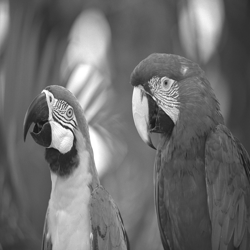

In [96]:
url="https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png"
from PIL import Image
import requests
image=Image.open(requests.get(url,stream=True).raw)
small_image = image.resize((250, 250))
small_image

In [98]:
type(small_image), type(image)

(PIL.Image.Image, PIL.PngImagePlugin.PngImageFile)

In [93]:
imagetotext(url,max_new_tokens=30)

[{'generated_text': 'two birds are standing next to each other '}]

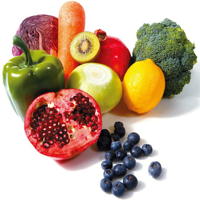

In [100]:
# 내 PC의 이미지 설명 
image = Image.open('images/fb.jpg')
image.resize((200,200))

In [101]:
imagetotext('images/fb.jpg', max_new_tokens=300)

[{'generated_text': 'a variety of fruits and vegetables are displayed on a table '}]

In [102]:
imagetotext(image, max_new_tokens=30)

[{'generated_text': 'a variety of fruits and vegetables are displayed on a table '}]

## 10. 이미지 분류

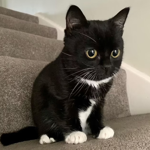

In [104]:
image = Image.open('images/cat.jpg')
image.resize((150,150))

In [108]:
imgclassifier = pipeline(task="image-classification",
                            model="google/vit-base-patch16-224")
# model명을 기입하지않으면 task에 따라 기본 모델 자동 셋팅

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [109]:
imgclassifier(image)

[{'label': 'Egyptian cat', 'score': 0.853131890296936},
 {'label': 'tabby, tabby cat', 'score': 0.04750382527709007},
 {'label': 'tiger cat', 'score': 0.03486616536974907},
 {'label': 'Persian cat', 'score': 0.007555846590548754},
 {'label': 'Siamese cat, Siamese', 'score': 0.003788590431213379}]